In [32]:
# automatically reload the package when it is modified
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
from mtr.models import model as model_utils
from mtr.config import cfg, cfg_from_list, cfg_from_yaml_file, log_config_to_file
from mtr.datasets.waymo.waymo_dataset import WaymoDataset
from tools.mtr_env import BatchMTREnv
from tools.mtr_inference import MTRInference
import numpy as np
import torch
import matplotlib.pyplot as plt


cfg_file = 'tools/cfgs/waymo/bc+10_percent_data.yaml'
ckpt_path = 'output/bc/epoch=2-step=4602.ckpt'
cfg = cfg_from_yaml_file(cfg_file, cfg)

dataset = WaymoDataset(cfg.DATA_CONFIG, training=False)
mtr_inference = MTRInference(cfg_file)
mtr_inference.load_from_checkpoint(ckpt_path)
mtr_inference.model.eval()
env = BatchMTREnv(4, dataset)


=========== MTR Inference ===========


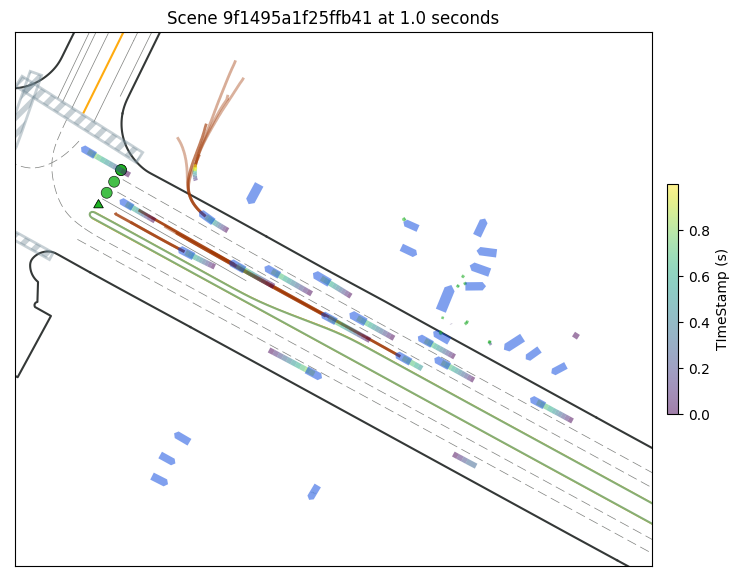

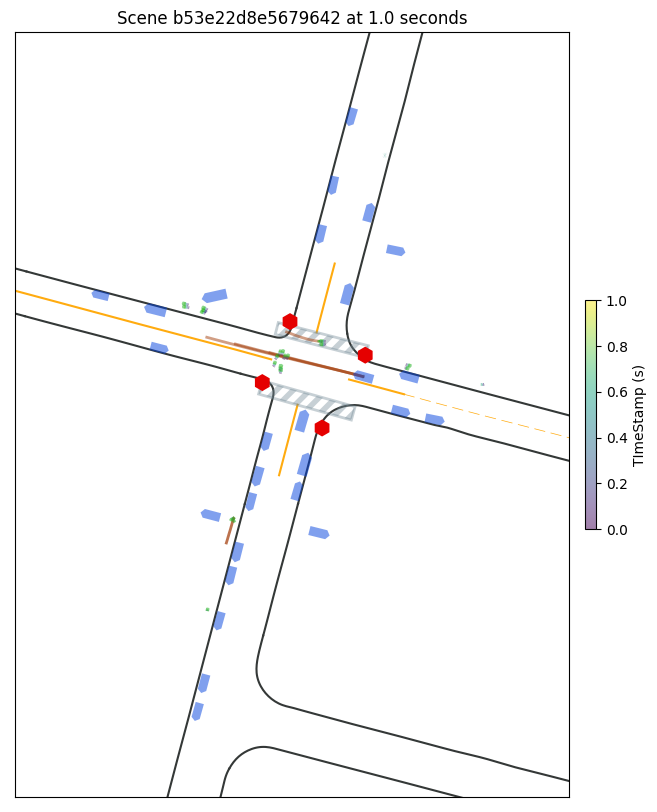

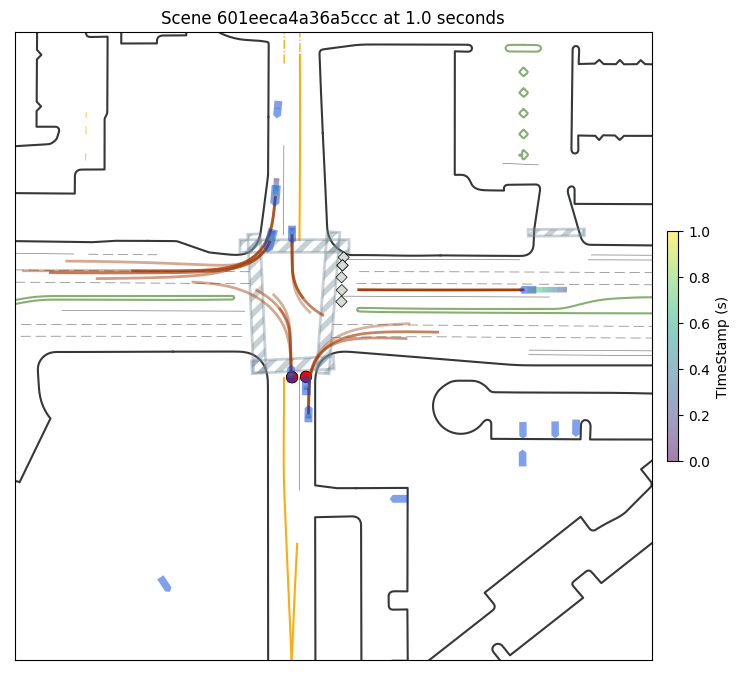

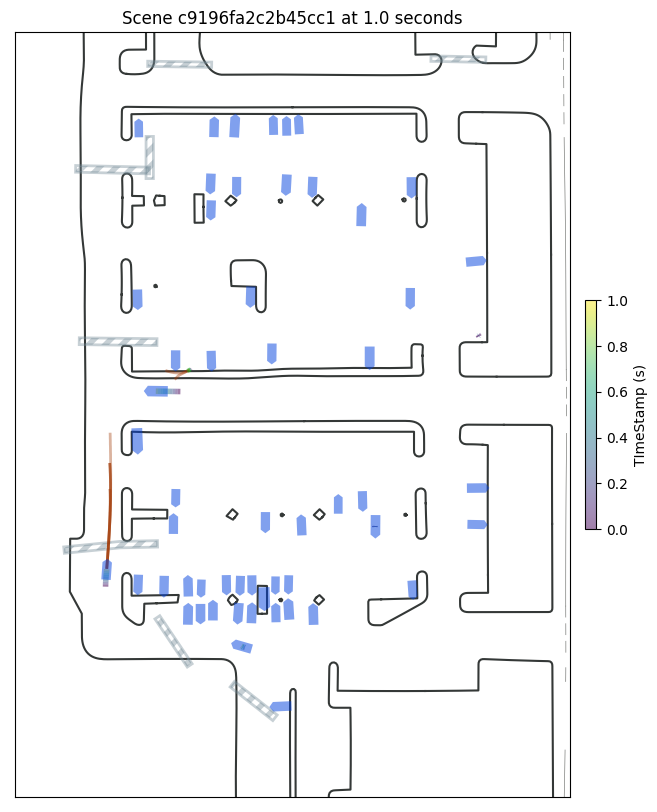

In [58]:
env.reset()
batch_scene_data = env.batch_scene_data
with torch.no_grad():
    batch_pred_dicts = mtr_inference.inference(batch_scene_data)
_ = env.visualize(batch_dict= batch_pred_dicts)